In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

In [20]:
data = pd.read_csv("../csv/resumen_nacional.csv")
#data_pacientes_en_uci = pd.read_csv("../csv/pacientes_en_uci.csv")

In [21]:
#data_pacientes_en_uci

In [22]:
data.tail()

dia  confirmados  muertes
76  05/22/2020        61857      630
77  05/23/2020        65393      673
78  05/24/2020        69102      718
79  05/25/2020        73997      761
80  05/26/2020        77961      806

In [23]:
n = data["confirmados"].count()-1

print("Total de Confirmados ", data["dia"][n], " = ", data["confirmados"][n] )
print("Total de Fallecidos al ", data["dia"][n], " = ", data["muertes"][n])

confirmados_ultimas_24h = data["confirmados"][n] - data["confirmados"][n-1]
print("Confirmados ultimas 24h = ", confirmados_ultimas_24h )

muertes_ultimas_24h = data["muertes"][n] - data["muertes"][n-1]
print("Fallecidos ultimas 24h = ", muertes_ultimas_24h )



Total de Confirmados  05/26/2020  =  77961
Total de Fallecidos al  05/26/2020  =  806
Confirmados ultimas 24h =  3964
Fallecidos ultimas 24h =  45


In [46]:
#df_nro_confirmados_dia = pd.DataFrame(dict(nro_confirmados_dia = data["confirmados"][1] - data["confirmados"][0]))

d = []

for i in range(n):
    diff_confirmados = data["confirmados"][i+1] - data["confirmados"][i]
    diff_muertes = data["muertes"][i+1] - data["muertes"][i]
    d.append((diff_confirmados,diff_muertes))
    
    
df = pd.DataFrame(d, columns=("Confirmados dia", "Fallecidos dia"))
#   print(i, "\n")
df
#nro_confirmados_dia

Confirmados dia  Fallecidos dia
0                 2               0
1                 3               0
2                 5               0
3                 6               0
4                10               0
..              ...             ...
75             4276              41
76             3536              43
77             3709              45
78             4895              43
79             3964              45

[80 rows x 2 columns]

In [14]:
data.describe()

confirmados     muertes
count     81.000000   81.000000
mean   16331.456790  178.185185
std    19792.783738  206.511084
min        7.000000    0.000000
25%     1610.000000    5.000000
50%     8807.000000  105.000000
75%    23048.000000  275.000000
max    77961.000000  806.000000

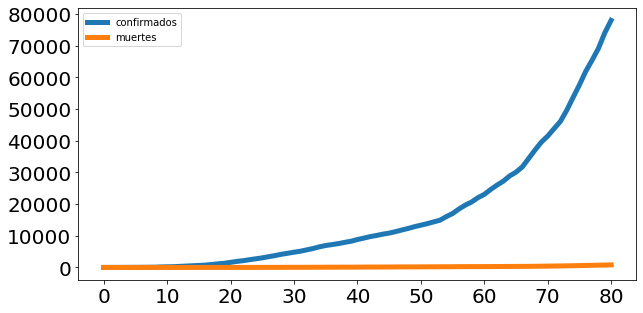

In [15]:
#data.plot(kind="line", x="dia" , y= ["confirmados", "muertes"], figsize = (10,5) )
data.plot(figsize=(10,5), linewidth=5, fontsize=20 )

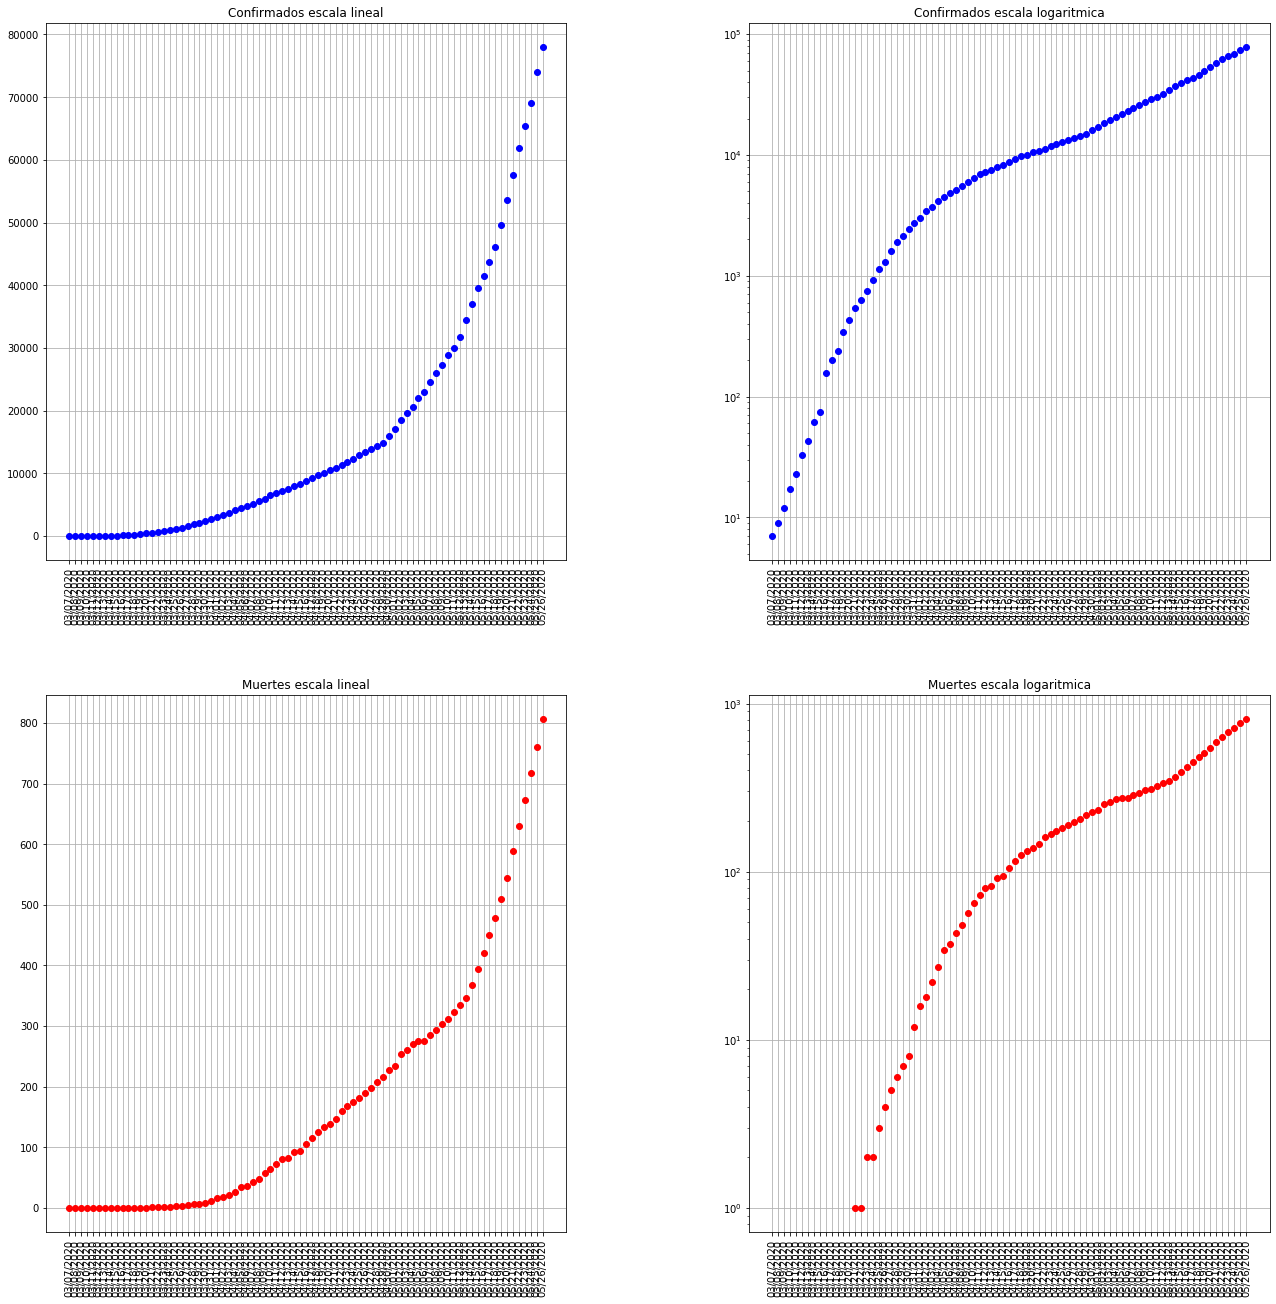

In [16]:
plt.figure(figsize= [20, 20])

plt.subplot(221)
#data.plot( x="dia", y="confirmados" )
plt.plot(data["dia"], data["confirmados"], 'bo', linewidth=5)
plt.title('Confirmados escala lineal')
plt.grid(True)
plt.xticks(rotation=90)

plt.subplot(222)
#data.plot( x="dia", y="confirmados" )
plt.plot(data["dia"], data["confirmados"], 'bo', linewidth=5)
plt.yscale('log')
plt.title('Confirmados escala logaritmica')
plt.grid(True)
plt.xticks(rotation=90)

plt.subplot(223)
#data.plot( x="dia", y="muertes" )
plt.plot(data["dia"], data["muertes"], 'ro', linewidth=5 )
plt.title('Muertes escala lineal')
plt.grid(True)
plt.xticks(rotation=90)

plt.subplot(224)
#data.plot( x="dia", y="muertes" )
plt.plot(data["dia"], data["muertes"], 'ro', linewidth=5 )
plt.yscale('log')
plt.title('Muertes escala logaritmica')
plt.grid(True)
plt.xticks(rotation=90)

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()



In [17]:
#figure , axes = plt.subplots(2, sharex=True)
#data.plot(x="dia", y="confirmados", ax=axes[0], figsize=(15,15) , grid=True)
#data.plot(x="dia", y="muertes" , ax=axes[1], figsize=(15,15), color="r" , grid=True)